In [90]:
import pandas as pd
import pyarrow.parquet as pq
import datetime


## Get some data to experiment

I extract one series from the train set, i need later to change the code to go series by series, otherwise mistakes will occure.

In [91]:
file_path = '/Users/ra/Library/CloudStorage/OneDrive-HochschuleLuzern/AICH/data/Prepared/V2/train_20231021'

table = pq.read_table(file_path)

# Convert the table to a Pandas DataFrame
df = table.to_pandas()

In [92]:
df.head(3)

,step,anglez,enmo,hour,minute,seconds,day,month,year,seconds_from_midnight,awake,wearable_on,series_id,onset,wakeup
25764840,0,-89.497597,0.0182,11,0,0,6,8,2018,39600,1.0,0.0,2fc653ca75c7,0,0
25764841,1,-89.497398,0.0182,11,0,5,6,8,2018,39605,1.0,0.0,2fc653ca75c7,0,0
25764842,2,-89.495598,0.0180,11,0,10,6,8,2018,39610,1.0,0.0,2fc653ca75c7,0,0


In [93]:
series_list =df.series_id.unique().tolist()

In [94]:
series_list[:2]

['2fc653ca75c7', '31011ade7c0a']

only taking one series for experimenting

In [95]:
sample = df[df.series_id.isin(series_list[1:2])]

sample.head(3)

,step,anglez,enmo,hour,minute,seconds,day,month,year,seconds_from_midnight,awake,wearable_on,series_id,onset,wakeup
26181720,0,-82.680603,0.0,16,45,0,15,8,2017,60300,1.0,0.0,31011ade7c0a,0,0
26181721,1,-82.680603,0.0,16,45,5,15,8,2017,60305,1.0,0.0,31011ade7c0a,0,0
26181722,2,-82.680603,0.0,16,45,10,15,8,2017,60310,1.0,0.0,31011ade7c0a,0,0


In [96]:
sample.series_id.unique()

array(['31011ade7c0a'], dtype=object)

In [97]:
sample.awake.unique()

array([1., 0.])

In [98]:
sample.wearable_on.unique()

array([0., 1.])

I have to recreat the timestamp, maybe we fix this an keep the timestamp for the future or so?

In [99]:
# Convert numeric columns to strings
sample.loc[:, 'hour'] = sample['hour'].astype(str).str.zfill(2)
sample.loc[:, 'minute'] = sample['minute'].astype(str).str.zfill(2)
sample.loc[:, 'seconds'] = sample['seconds'].astype(str).str.zfill(2)
sample.loc[:, 'day'] = sample['day'].astype(str).str.zfill(2)
sample.loc[:, 'month'] = sample['month'].astype(str).str.zfill(2)
sample.loc[:, 'year'] = sample['year'].astype(str)

# Combine the columns into a new column 'timestamp'
sample['timestamp'] = sample['year'] + '-' + sample['month'] + '-' + sample['day'] + ' ' + sample['hour'] + ':' + sample['minute'] + ':' + sample['seconds']

# Convert 'timestamp' to datetime format
sample['timestamp'] = pd.to_datetime(sample['timestamp'])


/var/folders/40/3xwnc19j5wddty6wnqjyxg1h0000gn/T/ipykernel_2031/1806208151.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sample['timestamp'] = sample['year'] + '-' + sample['month'] + '-' + sample['day'] + ' ' + sample['hour'] + ':' + sample['minute'] + ':' + sample['seconds']
/var/folders/40/3xwnc19j5wddty6wnqjyxg1h0000gn/T/ipykernel_2031/1806208151.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sample['timestamp'] = pd.to_datetime(sample['timestamp'])


In [100]:
sample.head(3)

,step,anglez,enmo,hour,minute,seconds,day,month,year,seconds_from_midnight,awake,wearable_on,series_id,onset,wakeup,timestamp
26181720,0,-82.680603,0.0,16,45,00,15,08,2017,60300,1.0,0.0,31011ade7c0a,0,0,2017-08-15 16:45:00
26181721,1,-82.680603,0.0,16,45,05,15,08,2017,60305,1.0,0.0,31011ade7c0a,0,0,2017-08-15 16:45:05
26181722,2,-82.680603,0.0,16,45,10,15,08,2017,60310,1.0,0.0,31011ade7c0a,0,0,2017-08-15 16:45:10


# i store the true values, to see how it works

In [101]:
true = sample.copy()
true.head()

,step,anglez,enmo,hour,minute,seconds,day,month,year,seconds_from_midnight,awake,wearable_on,series_id,onset,wakeup,timestamp
26181720,0,-82.680603,0.0,16,45,00,15,08,2017,60300,1.0,0.0,31011ade7c0a,0,0,2017-08-15 16:45:00
26181721,1,-82.680603,0.0,16,45,05,15,08,2017,60305,1.0,0.0,31011ade7c0a,0,0,2017-08-15 16:45:05
26181722,2,-82.680603,0.0,16,45,10,15,08,2017,60310,1.0,0.0,31011ade7c0a,0,0,2017-08-15 16:45:10
26181723,3,-82.680603,0.0,16,45,15,15,08,2017,60315,1.0,0.0,31011ade7c0a,0,0,2017-08-15 16:45:15
26181724,4,-82.680603,0.0,16,45,20,15,08,2017,60320,1.0,0.0,31011ade7c0a,0,0,2017-08-15 16:45:20


i only keep necessary columns for the moment

In [102]:
sample = sample.reset_index()
sample= sample[['step', 'awake', 'wearable_on', 'series_id', 'timestamp']]
sample.head(3)

,step,awake,wearable_on,series_id,timestamp
0,0,1.0,0.0,31011ade7c0a,2017-08-15 16:45:00
1,1,1.0,0.0,31011ade7c0a,2017-08-15 16:45:05
2,2,1.0,0.0,31011ade7c0a,2017-08-15 16:45:10


In [103]:
sample.awake.unique()

array([1., 0.])

In [104]:
sample.wearable_on.unique()

array([0., 1.])

## Add some noise to the data

TO DO: For the moment i need to add artifical noise to awake and wearable on

In [105]:
import numpy as np

# Define the probability of a value flip (0 to 1 or 1 to 0)
flip_probability = 0.15  # Adjust this value as needed

# Generate random noise
noise = np.random.rand(len(sample)) < flip_probability

# Apply noise to the 'awake' column
sample['awake'] = (sample['awake'] + noise) % 2


In [106]:
sample.head(20)

,step,awake,wearable_on,series_id,timestamp
0,0,1.0,0.0,31011ade7c0a,2017-08-15 16:45:00
1,1,1.0,0.0,31011ade7c0a,2017-08-15 16:45:05
2,2,1.0,0.0,31011ade7c0a,2017-08-15 16:45:10
3,3,1.0,0.0,31011ade7c0a,2017-08-15 16:45:15
4,4,1.0,0.0,31011ade7c0a,2017-08-15 16:45:20
5,5,0.0,0.0,31011ade7c0a,2017-08-15 16:45:25
6,6,1.0,0.0,31011ade7c0a,2017-08-15 16:45:30
7,7,0.0,0.0,31011ade7c0a,2017-08-15 16:45:35
8,8,0.0,0.0,31011ade7c0a,2017-08-15 16:45:40
9,9,1.0,0.0,31011ade7c0a,2017-08-15 16:45:45


## What happens with removed device timesteps...?

TO DO: restore the lost information of device removed
For the moment i work if i already had done this

## Encode wearable not on

For device not worn i give number 3 to awake, maybe i need smarter solution later on.

In [107]:
sample.loc[sample['wearable_on'] == 0.0, 'awake'] = 3

In [108]:
sample.awake.unique()

array([3., 1., 0.])

In [109]:
sample.head()

,step,awake,wearable_on,series_id,timestamp
0,0,3.0,0.0,31011ade7c0a,2017-08-15 16:45:00
1,1,3.0,0.0,31011ade7c0a,2017-08-15 16:45:05
2,2,3.0,0.0,31011ade7c0a,2017-08-15 16:45:10
3,3,3.0,0.0,31011ade7c0a,2017-08-15 16:45:15
4,4,3.0,0.0,31011ade7c0a,2017-08-15 16:45:20


## Step 1 binning the data on 1 min

In [110]:
# gets the most often occured value
custom_agg_function = lambda x: x.value_counts().idxmax()

# bin the serie dataframe
bin_size = '1Min'
new = sample.resample(bin_size, on='timestamp').agg({
    'series_id': 'first',
    'step': 'first',
    'awake': custom_agg_function,
    'wearable_on': custom_agg_function
}).reset_index()

In [111]:
# sanity check
new[new.step.isna()]

,timestamp,series_id,step,awake,wearable_on


In [112]:
new.head()

,timestamp,series_id,step,awake,wearable_on
0,2017-08-15 16:45:00,31011ade7c0a,0,3.0,0.0
1,2017-08-15 16:46:00,31011ade7c0a,12,3.0,0.0
2,2017-08-15 16:47:00,31011ade7c0a,24,3.0,0.0
3,2017-08-15 16:48:00,31011ade7c0a,36,3.0,0.0
4,2017-08-15 16:49:00,31011ade7c0a,48,3.0,0.0


## find the changes

In [113]:
# Find the occurrences of changes in the 'awake' column
change_indices = new[new['awake'].diff().ne(0)].index

# Print the indices where the 'awake' column value changes
print(change_indices)

Index([    0,   296,   836,  1033,  1034,  1153,  1154,  1181,  1182,  1397,
       ...
       44585, 44586, 45119, 45120, 45731, 45732, 46645, 46646, 46922, 46923],
      dtype='int64', length=301)


In [114]:
new['awake_changes'] = new['awake'].diff().ne(0).astype(int)
new.head(3)

,timestamp,series_id,step,awake,wearable_on,awake_changes
0,2017-08-15 16:45:00,31011ade7c0a,0,3.0,0.0,1
1,2017-08-15 16:46:00,31011ade7c0a,12,3.0,0.0,0
2,2017-08-15 16:47:00,31011ade7c0a,24,3.0,0.0,0


Just print the changes once to see

In [115]:
def print_changes(df):
    for index, row in df.iterrows():
        if row['awake_changes'] == 1:
            print(f"Row {index}:")
            print(f"  - Value of 'awake' for current row: {row['awake']}")
            if index > 0:
                previous_row = df.loc[index - 1]
                print(f"  - Value of 'awake' for previous row: {previous_row['awake']}")
            else:
                print("  - No previous row")
            print("--------------------------")

# Call the function
print_changes(new)


Row 0:
  - Value of 'awake' for current row: 3.0
  - No previous row
--------------------------
Row 296:
  - Value of 'awake' for current row: 0.0
  - Value of 'awake' for previous row: 3.0
--------------------------
Row 836:
  - Value of 'awake' for current row: 1.0
  - Value of 'awake' for previous row: 0.0
--------------------------
Row 1033:
  - Value of 'awake' for current row: 0.0
  - Value of 'awake' for previous row: 1.0
--------------------------
Row 1034:
  - Value of 'awake' for current row: 1.0
  - Value of 'awake' for previous row: 0.0
--------------------------
Row 1153:
  - Value of 'awake' for current row: 0.0
  - Value of 'awake' for previous row: 1.0
--------------------------
Row 1154:
  - Value of 'awake' for current row: 1.0
  - Value of 'awake' for previous row: 0.0
--------------------------
Row 1181:
  - Value of 'awake' for current row: 0.0
  - Value of 'awake' for previous row: 1.0
--------------------------
Row 1182:
  - Value of 'awake' for current row: 1.0


## add onset and wakeup

From the information of change and awake/asleep/not worn, i define possible canditates for onset and wakeup

In [116]:
def add_onset_add_wakeup(df):
    # Initialize a new column 'wakeup' with zeros
    df['wakeup'] = 0
    df['onset'] = 0

    for index, row in df.iterrows():
        if row['awake_changes'] == 1:
            if index > 0:
                previous_row = df.loc[index - 1]
                # Check condition for setting 'onset' column
                if row['awake'] == 0.0 and previous_row['awake'] == 1.0:
                    df.at[index, 'onset'] = 1
                
                # Check condition for setting 'wakeup' column
                if row['awake'] == 1.0 and previous_row['awake'] == 0.0:
                    df.at[index, 'wakeup'] = 1

# Call the function
add_onset_add_wakeup(new)


In [117]:
new.head()

,timestamp,series_id,step,awake,wearable_on,awake_changes,wakeup,onset
0,2017-08-15 16:45:00,31011ade7c0a,0,3.0,0.0,1,0,0
1,2017-08-15 16:46:00,31011ade7c0a,12,3.0,0.0,0,0,0
2,2017-08-15 16:47:00,31011ade7c0a,24,3.0,0.0,0,0,0
3,2017-08-15 16:48:00,31011ade7c0a,36,3.0,0.0,0,0,0
4,2017-08-15 16:49:00,31011ade7c0a,48,3.0,0.0,0,0,0


In [118]:
new[new['wakeup'] == 1]

,timestamp,series_id,step,awake,wearable_on,awake_changes,wakeup,onset
836,2017-08-16 06:41:00,31011ade7c0a,10032,1.0,1.0,1,1,0
1034,2017-08-16 09:59:00,31011ade7c0a,12408,1.0,1.0,1,1,0
1154,2017-08-16 11:59:00,31011ade7c0a,13848,1.0,1.0,1,1,0
1182,2017-08-16 12:27:00,31011ade7c0a,14184,1.0,1.0,1,1,0
1398,2017-08-16 16:03:00,31011ade7c0a,16776,1.0,1.0,1,1,0
...,...,...,...,...,...,...,...,...
44586,2017-09-15 15:51:00,31011ade7c0a,535032,1.0,1.0,1,1,0
45120,2017-09-16 00:45:00,31011ade7c0a,541440,1.0,1.0,1,1,0
45732,2017-09-16 10:57:00,31011ade7c0a,548784,1.0,1.0,1,1,0
46646,2017-09-17 02:11:00,31011ade7c0a,559752,1.0,1.0,1,1,0


## only keep sleeping windows longer than 30 min

In [134]:
len(new[new['wakeup'] == 1])

13

In [135]:
len(new[new['onset'] == 1])

12

In [164]:
test = pd.read_csv('../data/train_events.csv')
test.head()

,series_id,night,event,step,timestamp
0,038441c925bb,1,onset,4992.0,2018-08-14T22:26:00-0400
1,038441c925bb,1,wakeup,10932.0,2018-08-15T06:41:00-0400
2,038441c925bb,2,onset,20244.0,2018-08-15T19:37:00-0400
3,038441c925bb,2,wakeup,27492.0,2018-08-16T05:41:00-0400
4,038441c925bb,3,onset,39996.0,2018-08-16T23:03:00-0400


In [165]:
test['timestamp'] = test['timestamp'].astype(str)

test['timestamp'] = test['timestamp'].str.replace('T', ' ')

# Remove timezone information
test['timestamp'] = test['timestamp'].str[:-5]

test.head()



,series_id,night,event,step,timestamp
0,038441c925bb,1,onset,4992.0,2018-08-14 22:26:00
1,038441c925bb,1,wakeup,10932.0,2018-08-15 06:41:00
2,038441c925bb,2,onset,20244.0,2018-08-15 19:37:00
3,038441c925bb,2,wakeup,27492.0,2018-08-16 05:41:00
4,038441c925bb,3,onset,39996.0,2018-08-16 23:03:00


In [166]:
test['timestamp'] = pd.to_datetime(test['timestamp'])
test.head()


,series_id,night,event,step,timestamp
0,038441c925bb,1,onset,4992.0,2018-08-14 22:26:00
1,038441c925bb,1,wakeup,10932.0,2018-08-15 06:41:00
2,038441c925bb,2,onset,20244.0,2018-08-15 19:37:00
3,038441c925bb,2,wakeup,27492.0,2018-08-16 05:41:00
4,038441c925bb,3,onset,39996.0,2018-08-16 23:03:00


In [189]:
test = pd.get_dummies(test, columns=['event'], prefix='', prefix_sep='')
test.head()

,series_id,night,step,timestamp,onset,wakeup
0,038441c925bb,1,4992.0,2018-08-14 22:26:00,True,False
1,038441c925bb,1,10932.0,2018-08-15 06:41:00,False,True
2,038441c925bb,2,20244.0,2018-08-15 19:37:00,True,False
3,038441c925bb,2,27492.0,2018-08-16 05:41:00,False,True
4,038441c925bb,3,39996.0,2018-08-16 23:03:00,True,False


In [190]:
test['onset']= test['onset'].astype(int)
test['wakeup']= test['wakeup'].astype(int)
test.head()

,series_id,night,step,timestamp,onset,wakeup
0,038441c925bb,1,4992.0,2018-08-14 22:26:00,1,0
1,038441c925bb,1,10932.0,2018-08-15 06:41:00,0,1
2,038441c925bb,2,20244.0,2018-08-15 19:37:00,1,0
3,038441c925bb,2,27492.0,2018-08-16 05:41:00,0,1
4,038441c925bb,3,39996.0,2018-08-16 23:03:00,1,0


In [167]:
test[(test['series_id'] == '31011ade7c0a') & (test['event'] == 'wakeup')]

,series_id,night,event,step,timestamp
2899,31011ade7c0a,1,wakeup,10032.0,2017-08-16 06:41:00
2901,31011ade7c0a,2,wakeup,27312.0,2017-08-17 06:41:00
2903,31011ade7c0a,3,wakeup,45624.0,2017-08-18 08:07:00
2905,31011ade7c0a,4,wakeup,62232.0,2017-08-19 07:11:00
2907,31011ade7c0a,5,wakeup,79332.0,2017-08-20 06:56:00
2909,31011ade7c0a,6,wakeup,97332.0,2017-08-21 07:56:00
2911,31011ade7c0a,7,wakeup,114156.0,2017-08-22 07:18:00
2913,31011ade7c0a,8,wakeup,131580.0,2017-08-23 07:30:00
2915,31011ade7c0a,9,wakeup,149484.0,2017-08-24 08:22:00
2917,31011ade7c0a,10,wakeup,166140.0,2017-08-25 07:30:00


In [171]:
test[(test['series_id'] == '31011ade7c0a') & (test['event'] == 'onset')]

,series_id,night,event,step,timestamp
2898,31011ade7c0a,1,onset,3552.0,2017-08-15 21:41:00
2900,31011ade7c0a,2,onset,19836.0,2017-08-16 20:18:00
2902,31011ade7c0a,3,onset,39012.0,2017-08-17 22:56:00
2904,31011ade7c0a,4,onset,55344.0,2017-08-18 21:37:00
2906,31011ade7c0a,5,onset,73392.0,2017-08-19 22:41:00
2908,31011ade7c0a,6,onset,89136.0,2017-08-20 20:33:00
2910,31011ade7c0a,7,onset,106956.0,2017-08-21 21:18:00
2912,31011ade7c0a,8,onset,124104.0,2017-08-22 21:07:00
2914,31011ade7c0a,9,onset,142620.0,2017-08-23 22:50:00
2916,31011ade7c0a,10,onset,159924.0,2017-08-24 22:52:00


In [172]:
test[(test['series_id'] == '31011ade7c0a') & (test['event'] == 'wakeup')]

,series_id,night,event,step,timestamp
2899,31011ade7c0a,1,wakeup,10032.0,2017-08-16 06:41:00
2901,31011ade7c0a,2,wakeup,27312.0,2017-08-17 06:41:00
2903,31011ade7c0a,3,wakeup,45624.0,2017-08-18 08:07:00
2905,31011ade7c0a,4,wakeup,62232.0,2017-08-19 07:11:00
2907,31011ade7c0a,5,wakeup,79332.0,2017-08-20 06:56:00
2909,31011ade7c0a,6,wakeup,97332.0,2017-08-21 07:56:00
2911,31011ade7c0a,7,wakeup,114156.0,2017-08-22 07:18:00
2913,31011ade7c0a,8,wakeup,131580.0,2017-08-23 07:30:00
2915,31011ade7c0a,9,wakeup,149484.0,2017-08-24 08:22:00
2917,31011ade7c0a,10,wakeup,166140.0,2017-08-25 07:30:00


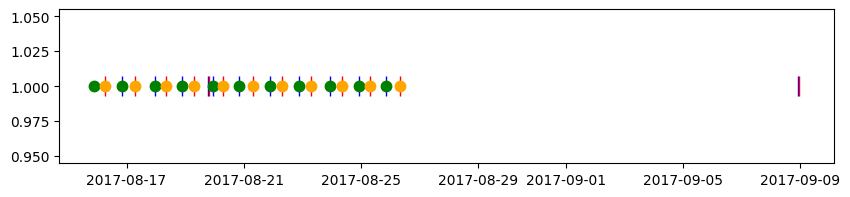

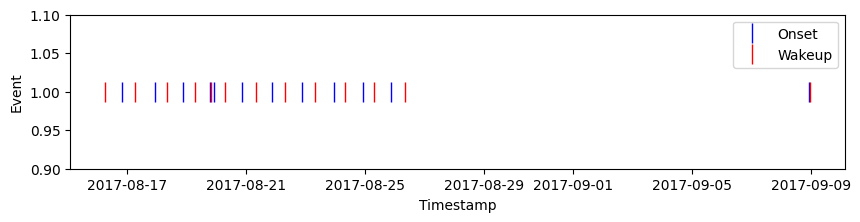

In [193]:
import matplotlib.pyplot as plt

# Assuming 'timestamp' column is already in datetime format
# If not, you can convert it using pd.to_datetime(new['timestamp'])

# Filter rows with onset or wakeup events
onset_events = new[new['onset'] == 1]
wakeup_events = new[new['wakeup'] == 1]
onset_events_true = test[(test['series_id'] == '31011ade7c0a') & (test['onset'] == 1)]
wakeup_events_true = test[(test['series_id'] == '31011ade7c0a') & (test['wakeup'] == 1)]

plt.figure(figsize=(10, 2))
plt.plot(onset_events['timestamp'], onset_events['onset'], '|', color='blue', markersize=15, label='Onset')
plt.plot(wakeup_events['timestamp'], wakeup_events['wakeup'], '|', color='red', markersize=15, label='Wakeup')
plt.plot(onset_events_true['timestamp'], onset_events_true['onset'], '.', color='green', markersize=15, label='Onset true')
plt.plot(wakeup_events_true['timestamp'], wakeup_events_true['wakeup'], '.', color='orange', markersize=15, label='Wakeup true')

plt.figure(figsize=(10, 2))
# Create a plot with vertical lines for events
plt.plot(onset_events['timestamp'], onset_events['onset'], '|', color='blue', markersize=15, label='Onset')
plt.plot(wakeup_events['timestamp'], wakeup_events['wakeup'], '|', color='red', markersize=15, label='Wakeup')
#plt.plot(onset_events_true['timestamp'], onset_events_true['event'], '.', color='green', markersize=15, label='Onset true')
#plt.plot(wakeup_events_true['timestamp'], wakeup_events_true['event'], '.', color='orange', markersize=15, label='Wakeup true')

# Add labels and legend
plt.xlabel('Timestamp')
plt.ylabel('Event')
plt.legend()
plt.ylim([0.9, 1.1])
plt.show()


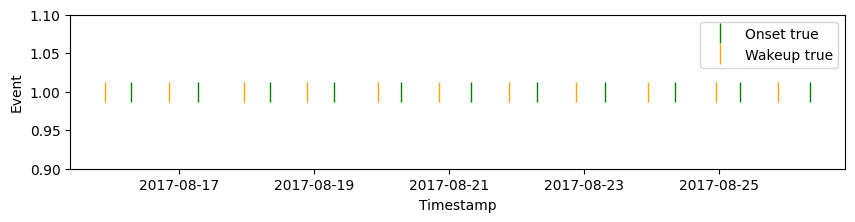

In [141]:
# Filter rows with onset or wakeup events
onset_events_true = true[true['onset'] == 1]
wakeup_events_true = true[true['wakeup'] == 1]

plt.figure(figsize=(10, 2))
# Create a plot with vertical lines for events
plt.plot(onset_events_true['timestamp'], onset_events_true['onset'], '|', color='green', markersize=15, label='Onset true')
plt.plot(wakeup_events_true['timestamp'], wakeup_events_true['wakeup'], '|', color='orange', markersize=15, label='Wakeup true')

# Add labels and legend
plt.xlabel('Timestamp')
plt.ylabel('Event')
plt.legend()
plt.ylim([0.9, 1.1])
plt.show()


In [147]:
true[true['onset' ]== 1]

,step,anglez,enmo,hour,minute,seconds,day,month,year,seconds_from_midnight,awake,wearable_on,series_id,onset,wakeup,timestamp
26191753,10033,14.055500,0.0000,06,41,05,16,08,2017,24065,1.0,1.0,31011ade7c0a,1,0,2017-08-16 06:41:05
26209033,27313,-5.640100,0.0000,06,41,05,17,08,2017,24065,1.0,1.0,31011ade7c0a,1,0,2017-08-17 06:41:05
26227345,45625,87.578400,0.0000,08,07,05,18,08,2017,29225,1.0,1.0,31011ade7c0a,1,0,2017-08-18 08:07:05
26243953,62233,47.191101,0.0005,07,11,05,19,08,2017,25865,1.0,1.0,31011ade7c0a,1,0,2017-08-19 07:11:05
26261053,79333,-30.002300,0.0000,06,56,05,20,08,2017,24965,1.0,1.0,31011ade7c0a,1,0,2017-08-20 06:56:05
26279053,97333,68.787201,0.0000,07,56,05,21,08,2017,28565,1.0,1.0,31011ade7c0a,1,0,2017-08-21 07:56:05
26295877,114157,-21.974100,0.0000,07,18,05,22,08,2017,26285,1.0,1.0,31011ade7c0a,1,0,2017-08-22 07:18:05
26313301,131581,-2.887400,0.0000,07,30,05,23,08,2017,27005,1.0,1.0,31011ade7c0a,1,0,2017-08-23 07:30:05
26331205,149485,-82.293701,0.0000,08,22,05,24,08,2017,30125,1.0,1.0,31011ade7c0a,1,0,2017-08-24 08:22:05
26347861,166141,38.460201,0.0000,07,30,05,25,08,2017,27005,1.0,1.0,31011ade7c0a,1,0,2017-08-25 07:30:05


In [148]:
test = pd.read_csv('../data/train_events.csv')
test[(test['series_id'] == '31011ade7c0a') & (test['event'] == 'wakeup')]

In [145]:
new[new['onset'] == 1]

,timestamp,series_id,step,awake,wearable_on,awake_changes,wakeup,onset
1653,2017-08-16 20:18:00,31011ade7c0a,19836,0.0,1.0,1,0,1
3251,2017-08-17 22:56:00,31011ade7c0a,39012,0.0,1.0,1,0,1
4612,2017-08-18 21:37:00,31011ade7c0a,55344,0.0,1.0,1,0,1
5905,2017-08-19 19:10:00,31011ade7c0a,70860,0.0,1.0,1,0,1
6116,2017-08-19 22:41:00,31011ade7c0a,73392,0.0,1.0,1,0,1
7428,2017-08-20 20:33:00,31011ade7c0a,89136,0.0,1.0,1,0,1
8913,2017-08-21 21:18:00,31011ade7c0a,106956,0.0,1.0,1,0,1
10343,2017-08-22 21:08:00,31011ade7c0a,124116,0.0,1.0,1,0,1
11885,2017-08-23 22:50:00,31011ade7c0a,142620,0.0,1.0,1,0,1
13327,2017-08-24 22:52:00,31011ade7c0a,159924,0.0,1.0,1,0,1


In [124]:
new[new['wakeup'] == 1]

,timestamp,series_id,step,awake,wearable_on,awake_changes,wakeup,onset
836,2017-08-16 06:41:00,31011ade7c0a,10032,1.0,1.0,1,1,0
1034,2017-08-16 09:59:00,31011ade7c0a,12408,1.0,1.0,1,1,0
1154,2017-08-16 11:59:00,31011ade7c0a,13848,1.0,1.0,1,1,0
1182,2017-08-16 12:27:00,31011ade7c0a,14184,1.0,1.0,1,1,0
1398,2017-08-16 16:03:00,31011ade7c0a,16776,1.0,1.0,1,1,0
...,...,...,...,...,...,...,...,...
44586,2017-09-15 15:51:00,31011ade7c0a,535032,1.0,1.0,1,1,0
45120,2017-09-16 00:45:00,31011ade7c0a,541440,1.0,1.0,1,1,0
45732,2017-09-16 10:57:00,31011ade7c0a,548784,1.0,1.0,1,1,0
46646,2017-09-17 02:11:00,31011ade7c0a,559752,1.0,1.0,1,1,0


In [125]:
new['timestamp'] = pd.to_datetime(new['timestamp'])


In [127]:
# Filter rows with onset or wakeup events
onset_events = new[new['onset'] == 1]
wakeup_events = new[new['wakeup'] == 1]

# Create an empty list to store time differences
time_to_next_wakeup = []

# Iterate through each onset event
for index, onset_row in onset_events.iterrows():
    # Find the next wakeup event
    next_wakeup = wakeup_events[wakeup_events['timestamp'] > onset_row['timestamp']].iloc[0]
    
    # Calculate the time difference in minutes
    time_diff = (next_wakeup['timestamp'] - onset_row['timestamp']).total_seconds() / 60
    
    # Append the time difference to the list
    time_to_next_wakeup.append(time_diff)

# Add the time differences as a new column in onset_events dataframe
onset_events['time_to_next_wakeup_minutes'] = time_to_next_wakeup

# Print the results
print(onset_events[['timestamp', 'time_to_next_wakeup_minutes']])


                timestamp  time_to_next_wakeup_minutes
1033  2017-08-16 09:58:00                          1.0
1153  2017-08-16 11:58:00                          1.0
1181  2017-08-16 12:26:00                          1.0
1397  2017-08-16 16:02:00                          1.0
1653  2017-08-16 20:18:00                        523.0
...                   ...                          ...
44585 2017-09-15 15:50:00                          1.0
45119 2017-09-16 00:44:00                          1.0
45731 2017-09-16 10:56:00                          1.0
46645 2017-09-17 02:10:00                          1.0
46922 2017-09-17 06:47:00                          1.0

[149 rows x 2 columns]


/var/folders/40/3xwnc19j5wddty6wnqjyxg1h0000gn/T/ipykernel_2031/3524495008.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  onset_events['time_to_next_wakeup_minutes'] = time_to_next_wakeup


## Iterate through the wakeups, if the time till next onset is < 30 min, i have to delete the two

In [128]:
# Filter rows with onset or wakeup events
onset_events = new[new['onset'] == 1]
wakeup_events = new[new['wakeup'] == 1]


In [129]:
wakeup_events.head()

,timestamp,series_id,step,awake,wearable_on,awake_changes,wakeup,onset
836,2017-08-16 06:41:00,31011ade7c0a,10032,1.0,1.0,1,1,0
1034,2017-08-16 09:59:00,31011ade7c0a,12408,1.0,1.0,1,1,0
1154,2017-08-16 11:59:00,31011ade7c0a,13848,1.0,1.0,1,1,0
1182,2017-08-16 12:27:00,31011ade7c0a,14184,1.0,1.0,1,1,0
1398,2017-08-16 16:03:00,31011ade7c0a,16776,1.0,1.0,1,1,0


In [130]:
len(wakeup_events)

150

In [131]:
for index, wakeup_row in wakeup_events.iterrows():
    #print(new.loc[index].name)
    next_onset_rows = new.iloc[index:].loc[new['onset'] == 1]
    if not next_onset_rows.empty:
        next_onset_index = next_onset_rows.iloc[0].name
        #print(next_onset_index)
        time_diff = (new.loc[next_onset_index]['timestamp'] - new.loc[index]['timestamp']).total_seconds() / 60
        print(time_diff)
        if time_diff < 30:
            print('delete')
            new.loc[index, 'wakeup'] = 0
            new.loc[next_onset_index, 'onset'] = 0
    else:
        print("No row found with 'onset' == 1 after index", index)


197.0
119.0
27.0
delete
215.0
255.0
1.0
delete
12.0
delete
96.0
63.0
236.0
425.0
138.0
1.0
delete
1.0
delete
106.0
219.0
69.0
413.0
1.0
delete
1.0
delete
346.0
372.0
23.0
delete
12.0
delete
173.0
1.0
delete
1.0
delete
1.0
delete
817.0
1.0
delete
802.0
63.0
84.0
5.0
delete
65.0
18.0
delete
364.0
225.0
256.0
121.0
96.0
211.0
232.0
1.0
delete
1.0
delete
1.0
delete
212.0
199.0
76.0
61.0
212.0
105.0
1.0
delete
305.0
367.0
139.0
1.0
delete
1.0
delete
1.0
delete
1.0
delete
1.0
delete
105.0
86.0
55.0
209.0
33.0
220.0
428.0
173.0
1533.0
8.0
delete
175.0
650.0
256.0
127.0
171.0
566.0
107.0
16.0
delete
161.0
804.0
48.0
161.0
404.0
959.0
434.0
1191.0
978.0
132.0
553.0
130.0
475.0
252.0
33.0
230.0
393.0
443.0
428.0
480.0
504.0
340.0
18.0
delete
76.0
51.0
338.0
420.0
150.0
445.0
206.0
162.0
31.0
223.0
48.0
211.0
91.0
480.0
440.0
294.0
220.0
319.0
753.0
69.0
19.0
delete
28.0
delete
768.0
137.0
153.0
306.0
236.0
163.0
132.0
44.0
12.0
delete
886.0
270.0
183.0
1367.0
1006.0
935.0
433.0
186.0
843.0
572.0

### now the oposite

In [132]:
# Filter rows with onset or wakeup events
onset_events = new[new['onset'] == 1]
wakeup_events = new[new['wakeup'] == 1]

In [133]:
for index, onset_row in onset_events.iterrows():
    #print(new.loc[index].name)
    next_wakeup_rows = new.iloc[index:].loc[new['wakeup'] == 1]
    if not next_wakeup_rows.empty:
        next_wakeup_index = next_wakeup_rows.iloc[0].name
        #print(next_onset_index)
        time_diff = (new.loc[next_wakeup_index]['timestamp'] - new.loc[index]['timestamp']).total_seconds() / 60
        print(time_diff)
        if time_diff < 30:
            print('delete')
            new.loc[index, 'onset'] = 0
            new.loc[next_wakeup_index, 'wakeup'] = 0
    else:
        print("No row found with 'onset' == 1 after index", index)

1.0
delete
29.0
delete
1.0
delete
636.0
1.0
delete
1.0
delete
1.0
delete
1.0
delete
551.0
1.0
delete
1.0
delete
1.0
delete
574.0
1.0
delete
38.0
495.0
683.0
600.0
1.0
delete
7.0
delete
20.0
delete
1.0
delete
622.0
1.0
delete
1.0
delete
1.0
delete
1.0
delete
572.0
1.0
delete
1.0
delete
1.0
delete
1.0
delete
1.0
delete
518.0
1.0
delete
1.0
delete
683.0
1.0
delete
1.0
delete
1.0
delete
1.0
delete
1.0
delete
1.0
delete
1.0
delete
1.0
delete
10.0
delete
1.0
delete
1.0
delete
1.0
delete
1.0
delete
1.0
delete
1.0
delete
18.0
delete
1.0
delete
1.0
delete
1.0
delete
1.0
delete
1.0
delete
1.0
delete
1.0
delete
1.0
delete
1.0
delete
1.0
delete
1.0
delete
1.0
delete
1.0
delete
1.0
delete
1.0
delete
1.0
delete
1.0
delete
1.0
delete
1.0
delete
1.0
delete
1.0
delete
20.0
delete
1.0
delete
1.0
delete
1.0
delete
1.0
delete
1.0
delete
1.0
delete
1.0
delete
1.0
delete
1.0
delete
1.0
delete
1.0
delete
1.0
delete
1.0
delete
1.0
delete
1.0
delete
1.0
delete
1.0
delete
1.0
delete
1.0
delete
50.0
1.0
delete
1

## if the break between two sleeping window is smaller than 30 min count it as one

## only keep the longest sleeping window of one night

## add a curve around the window with percentage

## Check with true lables